In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
len(train_data), len(test_data)

(8982, 2246)

In [27]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
train_labels[10]

3

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [7]:
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (8982, 46))

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [10]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [11]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20


16/16 [==============================] - 1s 29ms/step - loss: 2.7486 - accuracy: 0.4530 - val_loss: 1.8504 - val_accuracy: 0.6020
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.5764 - accuracy: 0.6736 - val_loss: 1.3787 - val_accuracy: 0.6710
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2006 - accuracy: 0.7407 - val_loss: 1.1857 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9880 - accuracy: 0.7844 - val_loss: 1.0737 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8297 - accuracy: 0.8212 - val_loss: 1.0066 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7004 - accuracy: 0.8533 - val_loss: 0.9470 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5924 - accuracy: 0.8771 - val_loss: 0.9235 - val_accuracy: 0.8090
Epoch 8/20


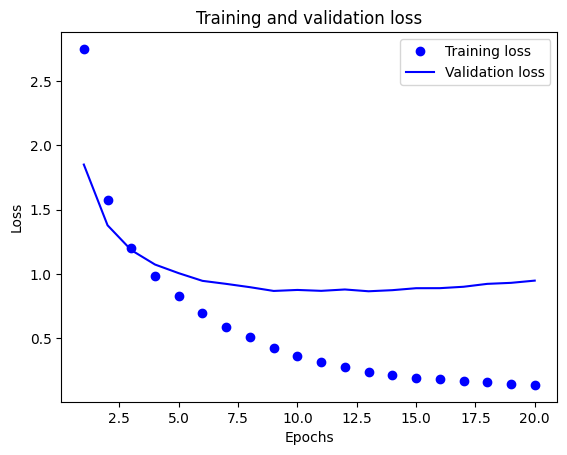

In [12]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

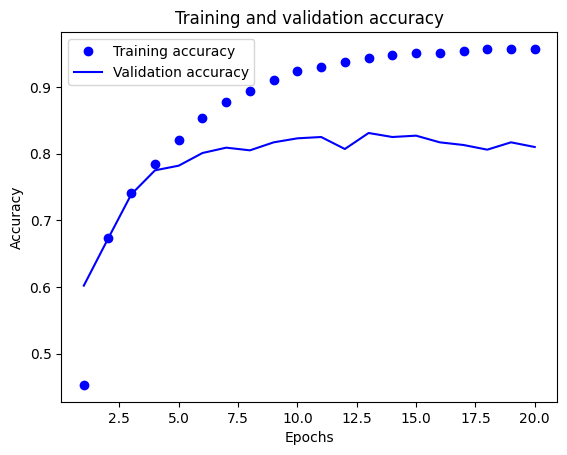

In [13]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

看上去9个左右epochs就差不多了

In [14]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
model.fit(x_train,
    y_train,
    epochs=9,
    batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 [==============================] - 1s 9ms/step - loss: 2.7255 - accuracy: 0.4506
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.5114 - accuracy: 0.6789
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 1.1315 - accuracy: 0.7634
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9143 - accuracy: 0.8082
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7503 - accuracy: 0.8417
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6215 - accuracy: 0.8664
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.5222 - accuracy: 0.8843
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.4347 - accuracy: 0.9066
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9307 - accuracy: 0.7943


[0.9306715726852417, 0.7943009734153748]

In [15]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 2ms/step


(46,)

In [16]:
np.sum(predictions[0])

1.0000001

In [17]:
np.argmax(predictions[0])

3

试试另一种处理标签的方法

In [18]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
y_train, y_train.shape

(array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64), (8982,))

In [19]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(x_train,
    y_train,
    epochs=9,
    batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
18/18 [==============================] - 1s 10ms/step - loss: 0.3310 - accuracy: 0.9272
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 0.2700 - accuracy: 0.9401
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 0.2419 - accuracy: 0.9430
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.2139 - accuracy: 0.9479
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.1992 - accuracy: 0.9499
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.1778 - accuracy: 0.9515
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.1656 - accuracy: 0.9532
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.1567 - accuracy: 0.9534
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.7836


[1.0579051971435547, 0.7836152911186218]

In [20]:
predictions[0]

array([3.72366740e-05, 1.09370063e-04, 2.77216964e-06, 7.74154902e-01,
       1.99002296e-01, 4.26132683e-05, 1.28579486e-04, 1.00214609e-04,
       1.00637116e-02, 9.32012626e-05, 4.78433276e-06, 1.40805426e-03,
       6.38105776e-05, 7.31388922e-04, 1.03167535e-04, 4.53745670e-05,
       4.99083381e-03, 2.77081679e-04, 1.39823951e-05, 2.35930012e-04,
       2.29933672e-03, 2.37480737e-03, 1.04895425e-05, 2.06224431e-04,
       8.09365611e-06, 7.87104182e-06, 3.28912370e-06, 1.86159421e-04,
       5.34830215e-05, 3.08913586e-04, 2.27691955e-04, 2.20298840e-04,
       6.02890577e-05, 2.83083718e-05, 1.76529415e-04, 7.41429394e-05,
       1.49744516e-03, 5.65815526e-06, 6.16655507e-06, 3.67666362e-04,
       2.50562316e-05, 1.81837328e-04, 2.47851676e-06, 3.25954825e-05,
       2.14411557e-05, 4.49062600e-06], dtype=float32)

试试远小于46的中间层维度

In [21]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.8289 - accuracy: 0.3492 - val_loss: 2.2000 - val_accuracy: 0.3840
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8993 - accuracy: 0.5392 - val_loss: 1.7079 - val_accuracy: 0.5690
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4888 - accuracy: 0.6160 - val_loss: 1.4687 - val_accuracy: 0.6100
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2665 - accuracy: 0.6580 - val_loss: 1.3792 - val_accuracy: 0.6330
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1199 - accuracy: 0.7033 - val_loss: 1.3066 - val_accuracy: 0.6670
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0131 - accuracy: 0.7328 - val_loss: 1.2698 - val_accuracy: 0.6840
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9251 - accuracy: 0.7587 - val_loss: 1.2722 - val_accuracy: 0.6940
Epoch 8/20
63/63 [=

[1.7911932468414307, 0.6976847648620605]

试试一个或三个中间层

In [22]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
history1 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
history3 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 2.7051 - accuracy: 0.5212 - val_loss: 1.9816 - val_accuracy: 0.6240
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6401 - accuracy: 0.6904 - val_loss: 1.4610 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.2121 - accuracy: 0.7608 - val_loss: 1.2143 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9648 - accuracy: 0.8038 - val_loss: 1.0790 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7985 - accuracy: 0.8384 - val_loss: 0.9892 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6728 - accuracy: 0.8651 - val_loss: 0.9336 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5747 - accuracy: 0.8881 - val_loss: 0.8951 - val_accuracy: 0.8150
Epoch 8/20
16

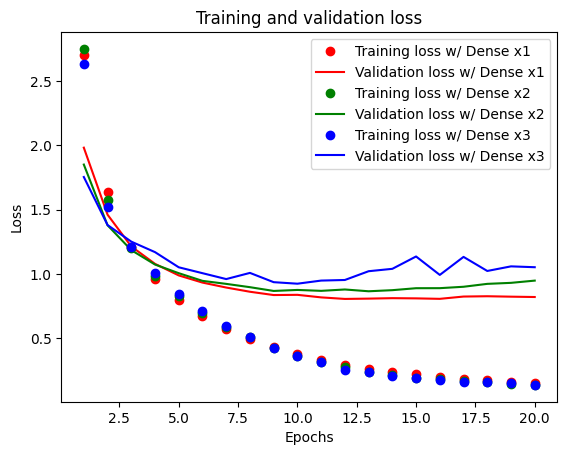

In [23]:
import matplotlib.pyplot as plt
color = ("r", "g", "b")
comment = ("Dense x1", "Dense x2", "Dense x3")
for index, history in enumerate((history1, history, history3)):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color[index]+"o", label="Training loss w/ " + comment[index])
    plt.plot(epochs, val_loss_values, color[index], label="Validation loss w/ " + comment[index])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

试试不同的层大小

In [24]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
history1 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
history3 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 3.1343 - accuracy: 0.3886 - val_loss: 2.4029 - val_accuracy: 0.5240
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 2.0392 - accuracy: 0.5809 - val_loss: 1.7198 - val_accuracy: 0.6100
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5207 - accuracy: 0.6720 - val_loss: 1.4235 - val_accuracy: 0.6780
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2588 - accuracy: 0.7169 - val_loss: 1.2807 - val_accuracy: 0.7050
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0875 - accuracy: 0.7552 - val_loss: 1.1795 - val_accuracy: 0.7370
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9557 - accuracy: 0.7898 - val_loss: 1.1202 - val_accuracy: 0.7440
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8470 - accuracy: 0.8143 - val_loss: 1.0612 - val_accuracy: 0.7640
Epoch 8/20
16

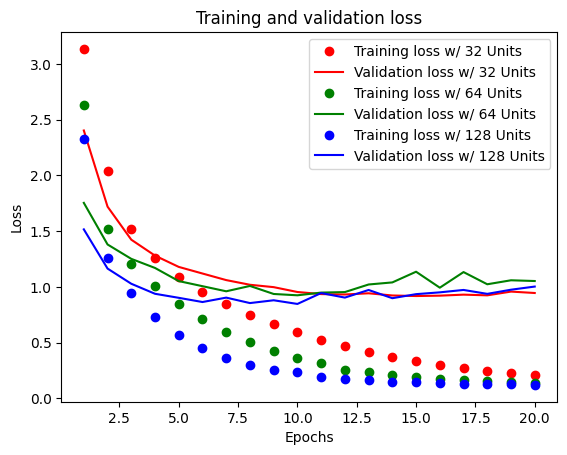

In [25]:
import matplotlib.pyplot as plt
color = ("r", "g", "b")
comment = ("32 Units", "64 Units", "128 Units")
for index, history in enumerate((history1, history, history3)):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color[index]+"o", label="Training loss w/ " + comment[index])
    plt.plot(epochs, val_loss_values, color[index], label="Validation loss w/ " + comment[index])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()